# Cost Prediction on acquiring Customers Dataset

## 1. Getting dataset from kaggle

In [ ]:
# Install the kaggle
!pip install -q kaggle

In [ ]:
# Choose the kaggle.json file that you downloaded under your profile from kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fahadrafiq8200","key":"477aa2ba744f618a2488e20d9d392d54"}'}

In [ ]:
!mkdir ~/.kaggle # Run if can't find this folder

In [ ]:
# Copy kaggle.json file there.
!cp kaggle.json ~/.kaggle/

In [ ]:
# Change the permissions of the file to get read and write access
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# That's all ! You can check if everything's okay by running this command
!kaggle datasets list

ref                                                       title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                       25KB  2023-04-13 09:55:16          16738        455  1.0              
chitrakumari25/corona-virus-latest-data-2023              Corona virus latest data 2023                      10KB  2023-04-29 16:00:51           1748         44  1.0              
utkarshx27/starbucks-nutrition                            Starbucks Nutrition Facts                           2KB  2023-05-10 05:42:59           1176         38  1.0              
utkarshx27/monthly-transportation-statistics              Monthly Transportation Statistics         

## 2. Downloading and unzipping dataset

In [ ]:
# Download the dataset
!kaggle datasets download -d ramjasmaurya/medias-cost-prediction-in-foodmart

  0% 0.00/1.53M [00:00<?, ?B/s]
100% 1.53M/1.53M [00:00<00:00, 147MB/s]


In [ ]:
# Unzip the dataset
!unzip /content/medias-cost-prediction-in-foodmart.zip

Archive:  /content/medias-cost-prediction-in-foodmart.zip
  inflating: media prediction and its cost.csv  


## 3. Exploring the dataset

In [ ]:
# Import the libaries
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the dataset and store it in Dataframe
df = pd.read_csv("/content/media prediction and its cost.csv")
# show the head of the dataframe
df.head(-5)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60418,Specialty,Carousel,Non-Consumable,8.28,2.7324,3.0,Save-It Sale,Mexico,M,M,...,17475.0,3671.0,2447.0,0.0,0.0,0.0,0.0,0.0,In-Store Coupon,67.63
60419,Specialty,Carousel,Non-Consumable,6.90,2.8290,3.0,Two Day Sale,Mexico,S,M,...,17475.0,3671.0,2447.0,0.0,0.0,0.0,0.0,0.0,Radio,73.27
60420,Specialty,Carousel,Non-Consumable,4.84,1.6940,4.0,Price Winners,Mexico,S,F,...,17475.0,3671.0,2447.0,0.0,0.0,0.0,0.0,0.0,Sunday Paper,112.19
60421,Specialty,Carousel,Non-Consumable,0.99,0.4554,1.0,Green Light Special,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Cash Register Handout,127.19


In [ ]:
df.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [ ]:
# Show the columns in the dataset
df_cols = df.columns
len(df_cols) , df_cols

(40,
 Index(['food_category', 'food_department', 'food_family',
        'store_sales(in millions)', 'store_cost(in millions)',
        'unit_sales(in millions)', 'promotion_name', 'sales_country',
        'marital_status', 'gender', 'total_children', 'education',
        'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
        'avg. yearly_income', 'num_children_at_home',
        'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
        'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
        'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
        'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
        'prepared_food', 'florist', 'media_type', 'cost'],
       dtype='object'))

## Preprocessing

In [ ]:
# Check for missing values
df.isna().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

# 1. Linear Set

## Dataset for univariate linear regression

In [ ]:
x = df["store_cost(in millions)"].values
y = df["store_sales(in millions)"].values
x, y

(array([2.7232, 2.5944, 1.3616, ..., 2.5392, 2.5668, 4.232 ]),
 array([7.36, 5.52, 3.68, ..., 5.52, 8.28, 9.2 ]))

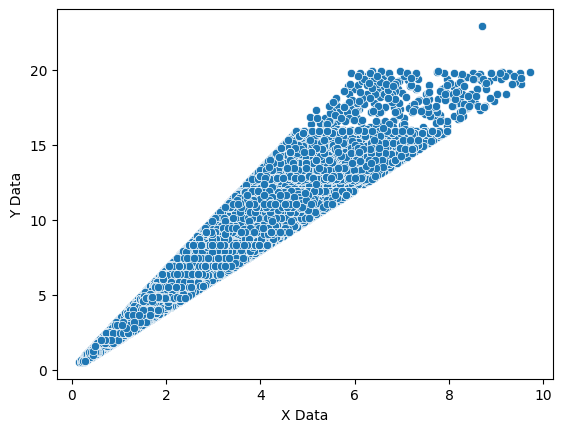

In [ ]:
# Create a scatter plot with a regression line
sns.scatterplot(x=x, y=y)

# Set the x-label and y-label
plt.xlabel("X Data")
plt.ylabel("Y Data")

# Show the plot
plt.show()

## Train and test dataset

In [ ]:
# Import the library
from sklearn.model_selection import train_test_split

In [ ]:
# Create the train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=42 ) #for producing the same dataset to contorl data leakage


In [ ]:
# check the shape of the dataset
x_train.shape , y_train.shape, x_test.shape, y_test.shape

((48342,), (48342,), (12086,), (12086,))

In [ ]:
# Reshape 1D data to 2D
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((48342, 1), (48342, 1), (12086, 1), (12086, 1))

## Simple Linear Regession

In [ ]:
# Import the library
from sklearn.linear_model import LinearRegression

In [ ]:
# Call and fit the model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predict on test dataset
preds_lr = lr.predict(x_test.reshape(-1,1))
preds_lr

array([[ 6.91260303],
       [ 8.30762279],
       [ 6.02535954],
       ...,
       [ 4.96476233],
       [10.37421761],
       [12.27428366]])

In [ ]:
# lets find the residual
residual_lr = (y_test - preds_lr)
residual_lr

array([[ 0.04739697],
       [ 0.63237721],
       [-0.32535954],
       ...,
       [-0.37476233],
       [-1.40421761],
       [ 2.84571634]])

## Calculate evaluation metrics

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# calculate mean squared error
mse_lr = mean_squared_error(y_test, preds_lr)

# calculate mean absolute error
mae_lr = mean_absolute_error(y_test, preds_lr)

# print the MSE and MAE
print('MSE:', mse_lr)
print('MAE:', mae_lr)

MSE: 1.074143573153282
MAE: 0.7995742914974527


## Plot the Residuals

In [ ]:
def plot_predictions(test_data=x_test,
                     test_labels=y_test,
                     predictions=preds_lr):

  plt.figure(figsize=(10, 7))
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.title("Testing Data vs Prediction")
  # Show the legend
  plt.legend();

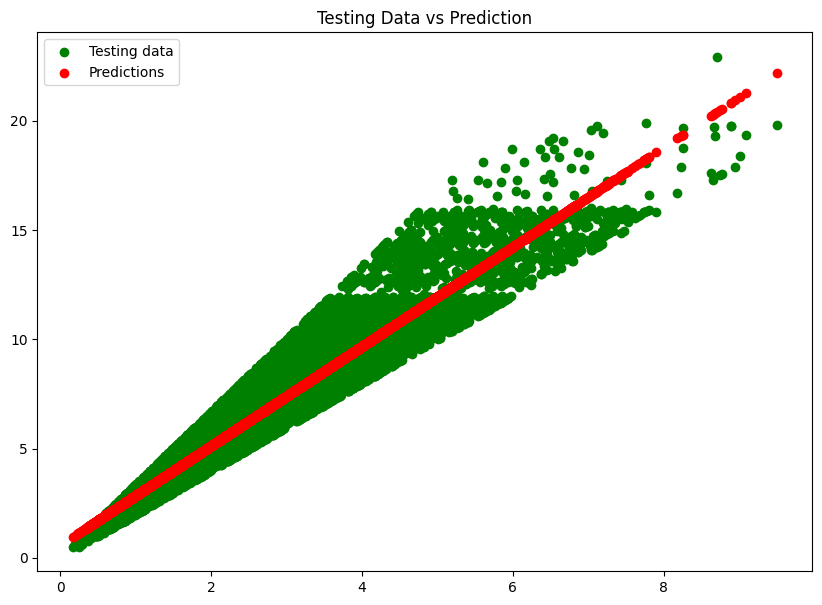

In [ ]:
plot_predictions()

In [ ]:
def plot_residuals(predictions, residual):
  # Create a scatter plot with residuals and predicted values
  plt.scatter(predictions, residual, color='green')

  # Add a horizontal line at y=0 to indicate the mean of residuals
  plt.axhline(y=0, color='red', linestyle='--')

  # Set the x-label and y-label
  plt.xlabel("Predicted Values")
  plt.ylabel("Residuals")

  # Show the plot
  plt.show()

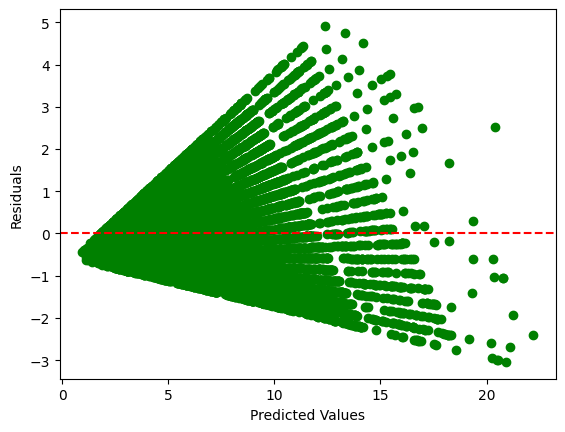

In [ ]:
plot_residuals(preds_lr, residual_lr)

**Since the Residual values is not centered around the 0 its mean that linear regression performing the not well and not capturing most of the variation in tha data**

# 2. k-nn regression

In [ ]:
# Import the function
from sklearn.neighbors import KNeighborsRegressor
# Call and fit
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
# Predict on test dataset
preds_knn_reg = knn_reg.predict(x_test.reshape(-1,1))
preds_knn_reg

array([[ 7.888],
       [ 8.94 ],
       [ 6.32 ],
       ...,
       [ 5.454],
       [10.552],
       [14.952]])

In [ ]:
# lets find the residual
residual_knn_reg = (y_test - preds_knn_reg)
residual_knn_reg

array([[-0.928],
       [ 0.   ],
       [-0.62 ],
       ...,
       [-0.864],
       [-1.582],
       [ 0.168]])

## Plot the residuals

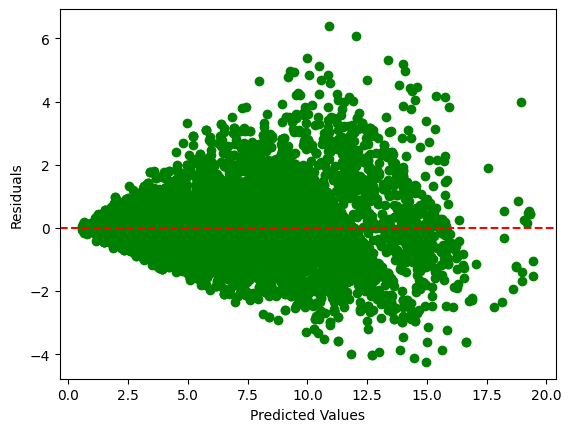

In [ ]:
plot_residuals(preds_knn_reg, residual_knn_reg)

**Since the Residual values is centered around the 0 its mean that linear regression performing the well and capturing most of the variation in the data**

## Calculate Evaluation metrics

In [ ]:
# calculate mean squared error
mse_knn_reg = mean_squared_error(y_test, preds_knn_reg)

# calculate mean absolute error
mae_knn_reg = mean_absolute_error(y_test, preds_knn_reg)

# print the MSE and MAE
print('MSE:', mse_knn_reg)
print('MAE:', mae_knn_reg)

MSE: 0.8258787165315241
MAE: 0.5859046831044183


# Compare Linear Regression vs knn Regessor

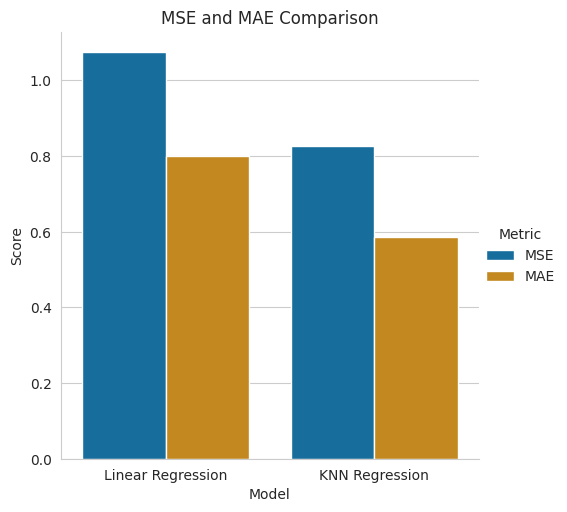

In [ ]:
# create a dataframe to store the scores and model names
data = {
    'Score': [mse_lr, mae_lr, mse_knn_reg, mae_knn_reg],
    'Metric': ['MSE', 'MAE', 'MSE', 'MAE'],
    'Model': ['Linear Regression', 'Linear Regression', 'KNN Regression', 'KNN Regression']
}
df_eval = pd.DataFrame(data)

# plot the scores using a bar plot
sns.set_style('whitegrid')
sns.catplot(x='Model', y='Score', hue='Metric', data=df_eval, kind='bar', palette='colorblind')
plt.title('MSE and MAE Comparison')
plt.show()

**We can see that KNN Regressor works well because the mse and mae is smaller while comapre to the Linear regession**

#  3. Logistic Regression

## Create the data

In [ ]:
new_df = df.loc[:, ["store_sales(in millions)" , "marital_status"]]
new_df.head()

,store_sales(in millions),marital_status
0,7.36,M
1,5.52,M
2,3.68,S
3,3.68,M
4,4.08,M


In [ ]:
# # Take the marital status categorical column and convert it into integer
new_df = pd.get_dummies(new_df)
new_df.head()

,store_sales(in millions),marital_status_M,marital_status_S
0,7.36,1,0
1,5.52,1,0
2,3.68,0,1
3,3.68,1,0
4,4.08,1,0


In [ ]:
# Using the store sales
x_cl = new_df["store_sales(in millions)"].values
y_cl = np.squeeze(pd.get_dummies(df["marital_status"], drop_first=True).values)
x_cl, y_cl

(array([7.36, 5.52, 3.68, ..., 5.52, 8.28, 9.2 ]),
 array([0, 0, 1, ..., 0, 1, 1], dtype=uint8))

## Create Train Test dataset

In [ ]:
# Create the train and test dataset
x_train_cl, x_test_cl, y_train_cl, y_test_cl = train_test_split(x_cl, y_cl,
                                                                            train_size=0.8,
                                                                            test_size=0.2,
                                                                            random_state=42 ) #for producing the same dataset to contorl data leakage


In [ ]:
# Reshape 1D data to 2D
x_train_cl = x_train_cl.reshape(-1,1)
y_train_cl = y_train_cl.reshape(-1,1)
x_test_cl = x_test_cl.reshape(-1,1)
y_test_cl = y_test_cl.reshape(-1,1)

In [ ]:
# check the shape of the dataset
x_train_cl.shape , y_train_cl.shape, x_test_cl.shape, y_test_cl.shape

((48342, 1), (48342, 1), (12086, 1), (12086, 1))

## Model

In [ ]:
from sklearn.linear_model import LogisticRegression
# Fit the model
clf_lr = LogisticRegression(random_state=0).fit(x_train_cl, y_train_cl)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Predict
preds_log_r = clf_lr.predict(x_test_cl)
preds_log_r

array([1, 0, 1, ..., 1, 0, 0], dtype=uint8)

In [ ]:
y_test_cl.shape, preds_log_r.shape

((12086, 1), (12086,))

In [ ]:
# lets find the residual
residual_log_r = (np.squeeze(y_test_cl) - preds_log_r)
residual_log_r

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

## Calculate Evaluation metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def calculate_eval_metrics(test_set, prediction):
  # Calculate evaluation metrics
  accuracy = accuracy_score(test_set, prediction)
  precision  = precision_score(test_set, prediction)
  recall  = recall_score(test_set, prediction)
  f1  = f1_score(test_set, prediction)

  # Print evaluation metrics
  print('Accuracy:', accuracy)
  print('Precision:', precision)
  print('Recall:', recall)
  print('F1-score:', f1)
  return accuracy, precision, recall, f1

In [ ]:
# Calculate evaluation metrics
accuracy_log_r, precision_log_r, recall_log_r, f1_log_r = calculate_eval_metrics(y_test_cl, preds_log_r)

Accuracy: 0.4986761542280324
Precision: 0.5001747640685075
Recall: 0.708182118112834
F1-score: 0.5862751792420621


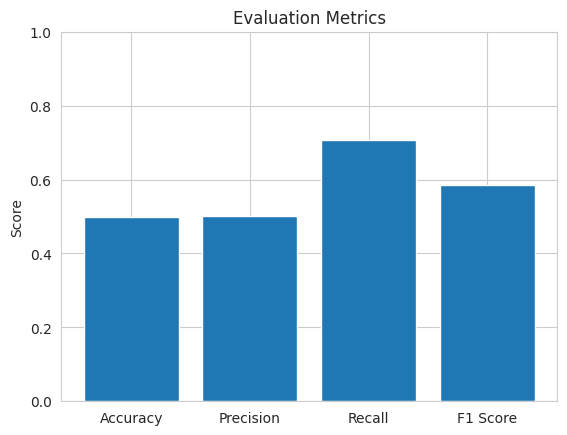

In [ ]:
# Plot the results
fig, ax = plt.subplots()
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_log_r , precision_log_r , recall_log_r , f1_log_r ]
ax.bar(metrics, values)
ax.set_ylim([0, 1])
ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics')
plt.show()

## Threshold value to maximize accuracy

In [ ]:
# Get predicted probabilities for positive class
probs = clf_lr.predict_proba(x_test_cl)[:, 1]

# Loop through different threshold values and compute recall and F1 score for each
f1_scores = []
recall_scores = []
for threshold in np.arange(0, 1.1, 0.1):
    preds = (probs >= threshold).astype(int)
    recall = recall_score(y_test_cl, preds)
    f1 = f1_score(y_test_cl, preds)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Find threshold index that maximizes recall and F1 score
max_f1_index = np.argmax(f1_scores)
max_recall_index = np.argmax(recall_scores)

# Find threshold value that maximizes recall and F1 score
optimal_threshold_f1 = max_f1_index * 0.1
optimal_threshold_recall = max_recall_index * 0.1

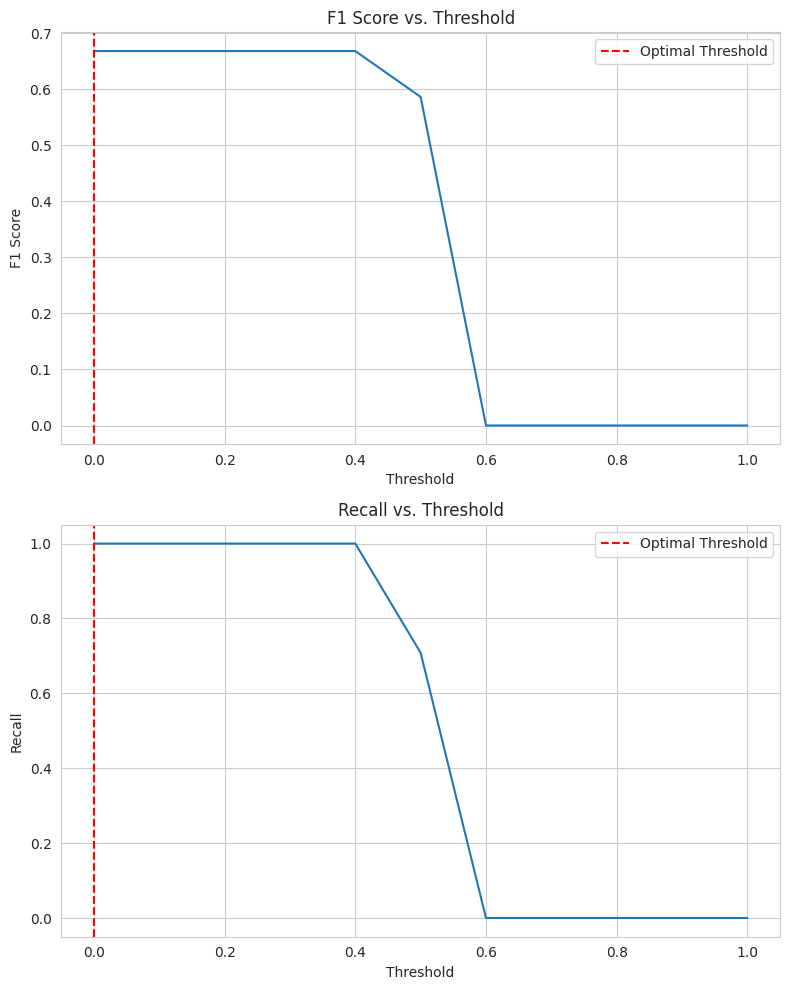

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Plot F1 scores
ax1.plot(np.arange(0, 1.1, 0.1), f1_scores)
ax1.set_title('F1 Score vs. Threshold')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('F1 Score')
ax1.axvline(x=optimal_threshold_f1, color='r', linestyle='--', label='Optimal Threshold')
ax1.legend()

# Plot recall scores
ax2.plot(np.arange(0, 1.1, 0.1), recall_scores)
ax2.set_title('Recall vs. Threshold')
ax2.set_xlabel('Threshold')
ax2.set_ylabel('Recall')
ax2.axvline(x=optimal_threshold_recall, color='r', linestyle='--', label='Optimal Threshold')
ax2.legend()

plt.tight_layout()
plt.show()


**For f1-score we can see that threshold value <= 0.4 maximize the f1-score to 65% and For recall we can see that threshold value <= 0.4 maximize the recall to 100%**

# Final Assignment

## Train_test-split

In [ ]:
# Import the library
from sklearn.model_selection import train_test_split

In [ ]:
# Create the train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=42 ) #for producing the same dataset to contorl data leakage


In [ ]:
# check the shape of the dataset
x_train.shape , y_train.shape, x_test.shape, y_test.shape

((48342,), (48342,), (12086,), (12086,))

In [ ]:
# Reshape 1D data to 2D
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((48342, 1), (48342, 1), (12086, 1), (12086, 1))

## Linear Regression

In [ ]:
# Import the library
from sklearn.linear_model import LinearRegression
# Call and fit the model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predict on test dataset
preds_lr = lr.predict(x_test)
preds_lr

array([[ 6.91260303],
       [ 8.30762279],
       [ 6.02535954],
       ...,
       [ 4.96476233],
       [10.37421761],
       [12.27428366]])

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# calculate mean squared error
mse_lr = mean_squared_error(y_test, preds_lr)

# calculate mean absolute error
mae_lr = mean_absolute_error(y_test, preds_lr)

# print the MSE and MAE
print('MSE:', mse_lr)
print('MAE:', mae_lr)

MSE: 1.074143573153282
MAE: 0.7995742914974527


## KNN regression

In [ ]:
# Import the function
from sklearn.neighbors import KNeighborsRegressor
# Call and fit
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
# Predict on test dataset
preds_knn_reg = knn_reg.predict(x_test)
preds_knn_reg

array([[ 7.888],
       [ 8.94 ],
       [ 6.32 ],
       ...,
       [ 5.454],
       [10.552],
       [14.952]])

In [ ]:
# calculate mean squared error
mse_knn = mean_squared_error(y_test, preds_knn_reg)

# calculate mean absolute error
mae_knn = mean_absolute_error(y_test, preds_knn_reg)

# print the MSE and MAE
print('MSE:', mse_knn)
print('MAE:', mae_knn)

MSE: 0.8258787165315241
MAE: 0.5859046831044183


## Decision Tree

In [ ]:
# import the libaries
from sklearn import tree

In [ ]:
# fit the model
dt_reg = clf = tree.DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
# get the predict
preds_dt_reg = dt_reg.predict(x_test)
preds_dt_reg

array([ 7.13846154,  8.94      ,  6.41272727, ...,  5.31      ,
       10.35785714, 14.84      ])

In [ ]:
# calculate mean squared error
mse_dt = mean_squared_error(y_test, preds_dt_reg)

# calculate mean absolute error
mae_dt = mean_absolute_error(y_test, preds_dt_reg)

# print the MSE and MAE
print('MSE:', mse_dt)
print('MAE:', mae_dt)

MSE: 0.6937087299826976
MAE: 0.4678843261871297


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand_f_reg = RandomForestRegressor(max_depth=25, random_state=0)
rand_f_reg.fit(x_train, y_train)

<ipython-input-175-f824bf5ba4eb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_f_reg.fit(x_train, y_train)


RandomForestRegressor(max_depth=25, random_state=0)

In [ ]:
# get the predict
preds_rand_f_reg = rand_f_reg.predict(x_test)
preds_rand_f_reg

array([ 7.11043346,  8.90373515,  6.33381133, ...,  5.29844172,
       10.34704489, 14.65971228])

In [ ]:
# calculate mean squared error
mse_rand_f = mean_squared_error(y_test, preds_rand_f_reg)

# calculate mean absolute error
mae_rand_f = mean_absolute_error(y_test, preds_rand_f_reg)

# print the MSE and MAE
print('MSE:', mse_rand_f)
print('MAE:', mae_rand_f)

MSE: 0.6885578787626079
MAE: 0.5198296578353047


## Plot Error

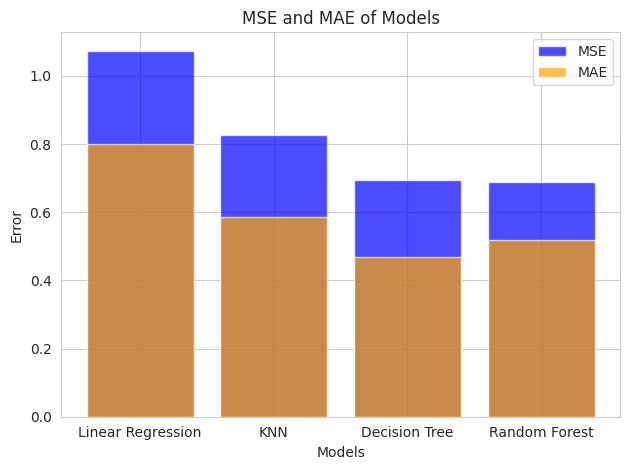

In [ ]:
import matplotlib.pyplot as plt

# MSE and MAE values for the four models
mse_scores = [mse_lr, mse_knn, mse_dt, mse_rand_f]
mae_scores = [mae_lr, mae_knn, mae_dt, mae_rand_f]

# Model labels
labels = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest']

# Plotting MSE and MAE
x_pos = range(len(labels))
plt.bar(x_pos, mse_scores, align='center', alpha=0.7, color='blue', label='MSE')
plt.bar(x_pos, mae_scores, align='center', alpha=0.7, color='orange', label='MAE')
plt.xticks(x_pos, labels)
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('MSE and MAE of Models')
plt.legend()
plt.tight_layout()
plt.show()

I got the smallest error of Decision Tree among all the models

## Different test set

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)

In [ ]:
# Predict on test dataset
preds_lr = lr.predict(x_test)
preds_knn_reg = knn_reg.predict(x_test)
preds_dt_reg = dt_reg.predict(x_test)
preds_rand_f_reg = rand_f_reg.predict(x_test)

In [ ]:
# calculate mean squared error and MAE
mse_lr = mean_squared_error(y_test, preds_lr)
mae_lr = mean_absolute_error(y_test, preds_lr)

mse_knn = mean_squared_error(y_test, preds_knn_reg)
mae_knn = mean_absolute_error(y_test, preds_knn_reg)


mse_dt = mean_squared_error(y_test, preds_dt_reg)
mae_dt = mean_absolute_error(y_test, preds_dt_reg)


mse_rand_f = mean_squared_error(y_test, preds_rand_f_reg)
mae_rand_f = mean_absolute_error(y_test, preds_rand_f_reg)

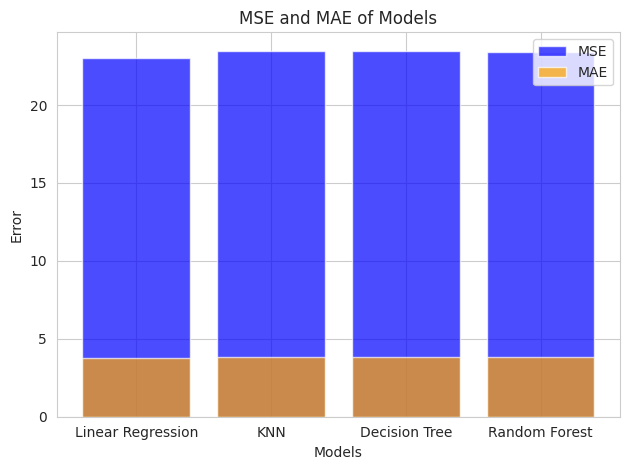

In [ ]:
import matplotlib.pyplot as plt

# MSE and MAE values for the four models
mse_scores = [mse_lr, mse_knn, mse_dt, mse_rand_f]
mae_scores = [mae_lr, mae_knn, mae_dt, mae_rand_f]

# Model labels
labels = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest']

# Plotting MSE and MAE
x_pos = range(len(labels))
plt.bar(x_pos, mse_scores, align='center', alpha=0.7, color='blue', label='MSE')
plt.bar(x_pos, mae_scores, align='center', alpha=0.7, color='orange', label='MAE')
plt.xticks(x_pos, labels)
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('MSE and MAE of Models')
plt.legend()
plt.tight_layout()
plt.show()

the Error is too high thats mean the model moght be overfitting on the previous data and one more reason is may be the data leakage.